In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

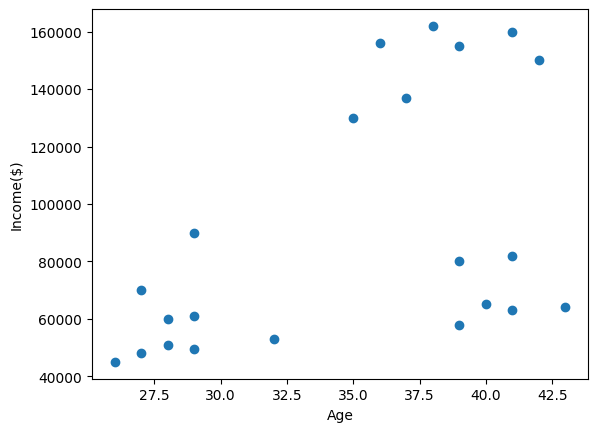

In [7]:
# visualization data on scatter plot, 

plt.scatter(data['Age'], data['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")


In [10]:
from sklearn.cluster import KMeans

KMeans_model = KMeans(n_clusters=3)
y_predict = KMeans_model.fit_predict(data[['Age', 'Income($)']])
y_predict

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [39]:
# Add Cluster column 

data['Cluster'] = y_predict

data.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [23]:
KMeans_model.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


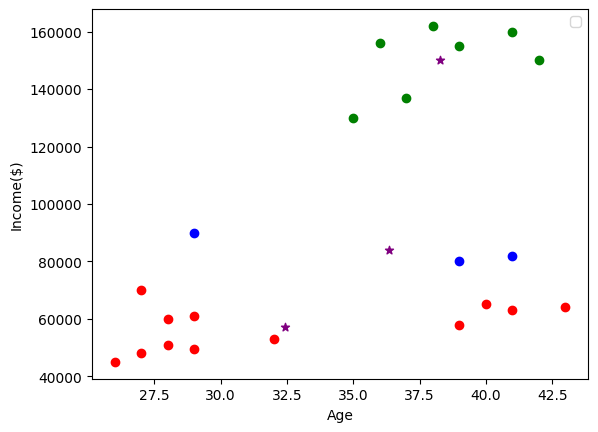

In [22]:
data0 = data[data['Cluster']==0]
data1 = data[data['Cluster']==1]
data2 = data[data['Cluster']==2]

plt.scatter(data0['Age'], data0['Income($)'], color='red')
plt.scatter(data1['Age'], data1['Income($)'], color='green')
plt.scatter(data2['Age'], data2['Income($)'], color='blue')
plt.scatter(KMeans_model.cluster_centers_[:,0], KMeans_model.cluster_centers_[:,1], color='purple', marker='*')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

here clustering is not perfect so, we need minmax scaller,

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])


scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

In [41]:
data.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


Text(0, 0.5, 'Income($)')

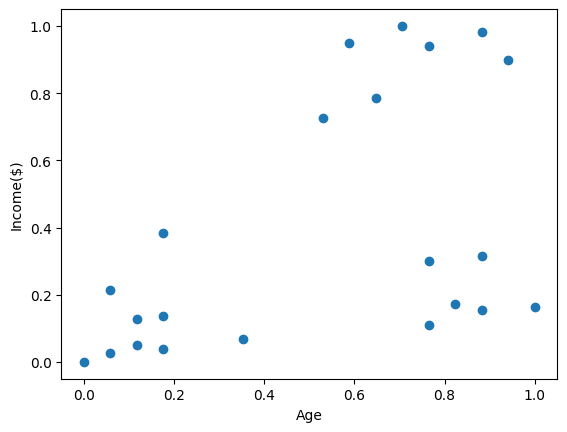

In [27]:
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [36]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(data[['Age','Income($)']])
y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [42]:
data.drop(['Cluster'], axis='columns',inplace=True)
data.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [43]:
data['Clusters'] = y_predict
data.head()

,Name,Age,Income($),Clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [30]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


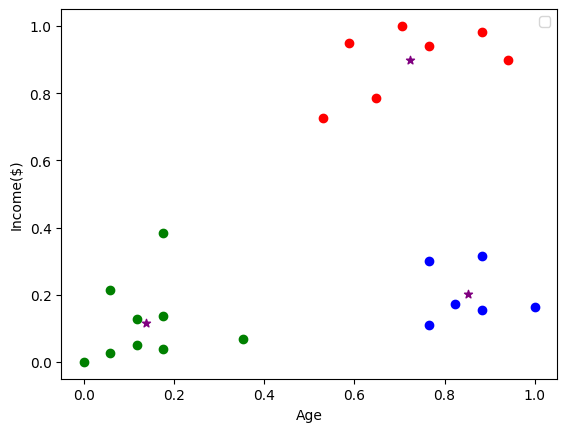

In [46]:
df0 = data[data['Clusters']==0]
df1 = data[data['Clusters']==1]
df2 = data[data['Clusters']==2]

plt.scatter(df0['Age'], df0['Income($)'], color='red')
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="purple", marker="*")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

Elbow plt

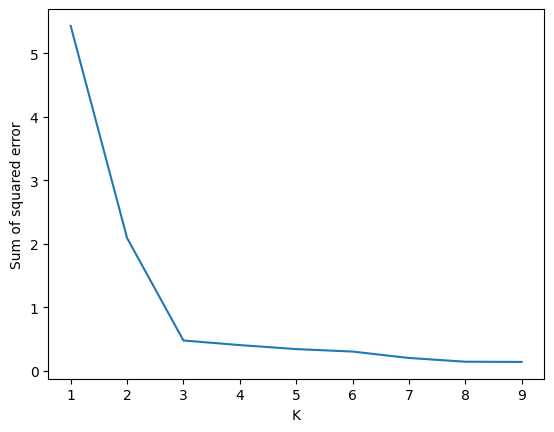

In [48]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

